![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

# Classification problem

We are going to treat a kind of problems like

* Email: spam or not spam?
* Online transaction: fraudolent or not?
* Tumor: malignant or benign?

These are all examples of a class of problems known as __classification__.

Let's suppose we have data about tumor size over a set of patients.
For instance, we classify tumor in benign or malignant by a label $y \in \{ 0, 1 \}$.
Where,

| $y$ |       class        | tumor nature |
|--|---|--|
| $0$ | __Negative class__ | benign    |
| $1$ | __Positive class__ | malignant |

We also have the size of tumors, so we can make a plot, like

In [1]:
# Standard imports.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = (15,10) # Change the default figure size

Text(0, 0.5, 'Class')

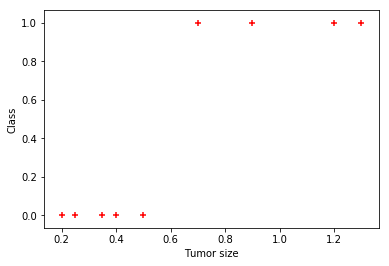

In [2]:
x = [0.2, 0.25, 0.35, 0.4, 0.5, 0.7, 0.9, 1.2, 1.3]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

plt.scatter(x, y, s=30, c='red', marker='+')
plt.xlabel('Tumor size')
plt.ylabel('Class')

Thus, let's imagine to define a threshold classifier, $h_\beta (x)$ at $0.5$ as follows,

$$\mbox{prediction} = \begin{cases} y = 1\qquad \mbox{if} & h_\beta(x) \geq 0.5 \\
                y = 0\qquad \mbox{if} & h_\beta(x) < 0.5 \end{cases} $$

__Classification problem__: we want to predict $y = 0$ or $y = 1$ with an hypothesis function $0 \leq h_\beta(x) \leq 1$

## Logistic regression

For linear regression the hypothesis function looked like

$$ h_\beta(x) = \beta_0 + \beta_1 x = \beta^T X \, .$$

To define the _logistic regression model_ we look for a function, in range $[0,1]$ and such that the prediction is $1$ if $h_\beta(x) \geq 0.5$ and $0$ otherwise.

This can be done thanks to the so-called [_sigmoid function_](https://en.wikipedia.org/wiki/Sigmoid_function).

$$ h_\beta (x) = g(\beta^T X) = \frac{1}{1 + e^{-\beta^T X}} $$

Let's define this as a python function.
Hence, we plot such a function.

In [3]:
# While using (return 1 / (1 + np.exp(-z))), per the sigmoid function, I was getting an overflow warning.
# As a solution warning can be ignored, or the dtype can be changed to not cause the error/warning.
# I used expit method from scipy to eliminate this issue.
from scipy.special import expit

# Defining sigmoid function:
def sigmoid(z):
    # return 1 / (1 + np.exp(-z))
    return expit(z)

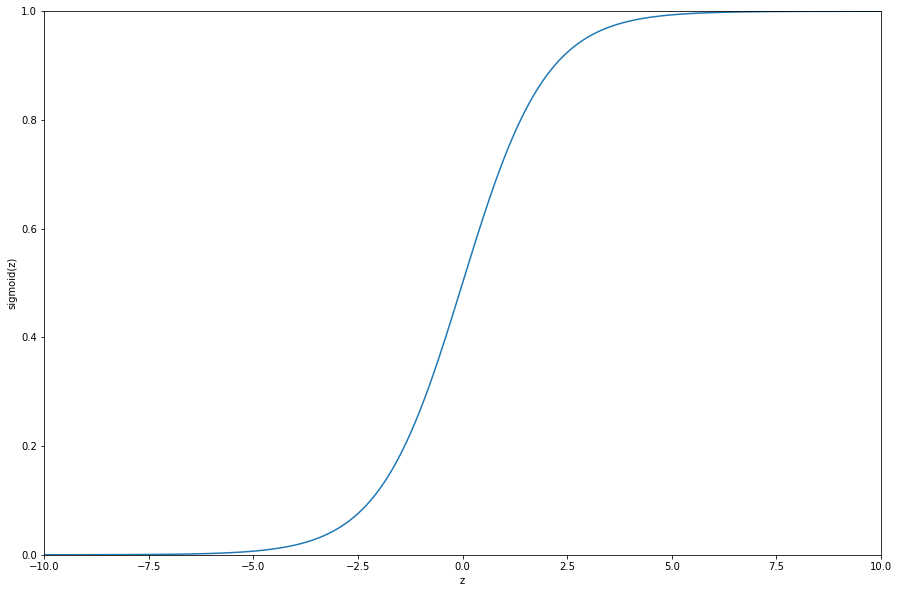

In [4]:
# Defining x range
x_val = np.linspace(-10, 10, 10000)

# and plotting the calculated sigmoid function:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(x_val, sigmoid(x_val))

# Labels and limits
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.xlim(x_val.min(), x_val.max())
plt.ylim(0, 1);

From the plot above, one can see an hypothesis modelled on the sigmoid function predicts $y=1$ if and only if $z \geq 0$, and in our model $z = \beta^T x$.

#### Interpretation of hypothesis output

One can see the value of $h_\beta(x)$ as the estimated probability that $y=1$, on a given input $x$.

### Gradient descent strikes back

A curious reader may wonder how do we insert parameters and fit them on our training dataset?

The curious reader would find the answers to this and to more interesting questions in the following.

#### Logistic regression cost function

In this part of the assignment we will implement cost function and gradient methods for logistic regression.

The mathematical expression for logistic regression cost function is

$$ J(\beta) = -\frac{1}{n} \sum y_i \log(h_\beta(x_i)) + (1 - y_i) \log(1 - h_\beta(x_i))\, .$$

Note $J(\beta) = 0$ if and only if alle the y labels are predicted correctly, more formally if and only if

$$ h_\beta (x_i) = y_i \quad \forall i\, .$$

__Question:__ How do we minimise such cost function?

Well, one method might be the _gradient descent_. 

Let's calculate the gradient of the expression above with respect to the variable $\beta$.
In a vector notation it looks like,

$$\nabla_{\beta} J(\beta) = \dfrac{1}{n} X^T (h_{\beta}(x) - y ) \, .$$

Let's now implement all of this with python functions.

In [5]:
# Defining costFunction method:
def costFunction(beta, X, y, C = 0):
    # Number of training examples
    m = len(y)
    y = np.array(y)
    # eps = 1e-15  was taken from the solution by jellis18
    # https://github.com/jellis18/ML-Course-Solutions/blob/master/ex2/ex2.ipynb
    # It is tolerance for sigmoid function, fixes loss of precision error. 
    # Eliminates errors while using BFGS minimization in calculations using scipy.
    eps = 1e-15
    
    hBetaX = sigmoid(np.dot(X, beta))
    
    J = - (np.dot(y, np.log(hBetaX)) + np.dot((1 - y), np.log(1 - hBetaX + eps))) / m + (C / (2 * m)) * np.dot(beta, beta)

    return J

In [6]:
# Defining gradientFunc:
def gradientFunc(beta, X, y, C=0):
    # Number of training examples
    m = len(y)
    y = np.array(y)
    
    hBetaX = sigmoid(np.dot(X, beta))
    
    gradient =  np.dot(X.T, (hBetaX - y)) / m + (C/m)*beta
    
    return gradient

In [7]:
# Defining gradient descent method
def gradientDescent(beta, X, y, alpha = .1, max_iterations = 1500, cost_thr = 1e-5, regular = 0):
    
    m = len(y) # Number of training examples
    
    y = np.array(y)
    cost = []
    betaMod = beta.copy()
    betaHist = []
    
    for i in range(max_iterations):                                 # complete here (the student has to write 
        betaMod = betaMod - (gradientFunc(betaMod, X, y, regular)* alpha)    # down this for-loop)
        cost.append(costFunction(betaMod, X, y, regular))
        betaHist.append(list(betaMod))
        # Exit conditions
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    
    return betaMod, cost, betaHist, i

__Observe__: As we wrote the functions labels $y_i$ must be in the set $\{0, 1\}$.

### Predictions with `sklearn`

We are now ready to make predictions.

Let's suppose Matthew goes to the doctor and finds out it has a tumor of size `x = 0.55`.

__question__ Can you calculate the probability Matthew has a benign tumor?

In [8]:
from sklearn.linear_model import LogisticRegression
x = np.array(x).reshape(-1,1)
size_test = np.array(0.55).reshape(1,-1) # Matthew tumor

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
pred = logreg.predict(size_test)

# complete such that the variable iscancer takes string values YES/NO

if pred == 0:
    iscancer = 'NO! =)'
else:
    iscancer = 'YES =('
    
print('Is the tumor malignant?', iscancer)

Is the tumor malignant? NO! =)


Good news for Matthew!
But what about the probability (or confidence) about such result?

Well, `sklearn` logistic regression has a method called `predict_proba` doing the job for us, let's just call this method.

In [10]:
prob = logreg.predict_proba(size_test)

NOprob = prob[0][0]
YESprob = prob[0][1]

print('Probability Matthew has no cancer: %.3f%%' %NOprob)
print('Probability Matthew has cancer: %.3f%%' %YESprob)

Probability Matthew has no cancer: 0.515%
Probability Matthew has cancer: 0.485%


Well, Matthew cannot be completely sure about his health conditions, better to keep checking.

__BONUS EXERCISE__: Can you do the same predictions using your implemented functions?
Compare results

In [11]:
# reshaping X
X = np.ones((len(x), 2))
X[:,1] = np.array(x).flatten() # why do we need to flatten the vector?

In [12]:
# initialise β
beta = np.zeros(X.shape[1])

# initialise parameters
max_iter = 1500
alpha = 0.01

In [13]:
# fit using gradientDescent

betaMod, cost, betaHist, iterations = gradientDescent(beta, X, y, alpha, max_iter)

In [14]:
# add bias term and reshape the size_test vector
x_test = np.array(0.55)
X_test = np.hstack((np.array([1]), x_test))
# predict
myPrediction = sigmoid(np.dot(X_test, betaMod))

print('The probability Matthew has a cancer is %.2f%%' %myPrediction)

The probability Matthew has a cancer is 0.47%


### Decision boundaries in logistic regression

In the next cells, we want to face the famous standard exercise in machine learning: _Iris dataset calssification_.

This will help us to focus on several important aspects of classification problems.

Let's consider a notorious [dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), describing iris flowers through four features: 

1. Sepal width
2. Sepal lenght
3. Petal width
4. Petal lenght

The problem formulation is really easy:

> Given a new iris flower, can we infer which species it belong to from its measures? 

Let's answer to this question!

![title](https://d31ezp3r8jwmks.cloudfront.net/variants/2dzeX71EceP88fenXxy1uj1t/d2e337a4f6900f8d0798c596eb0607a8e0c2fbddb6a7ab7afcd60009c119d4c7)

First of all, we select the first two features, just for the sake of simplicity and to visualise data in a graph.
Thus, we have only features regarding sepal.

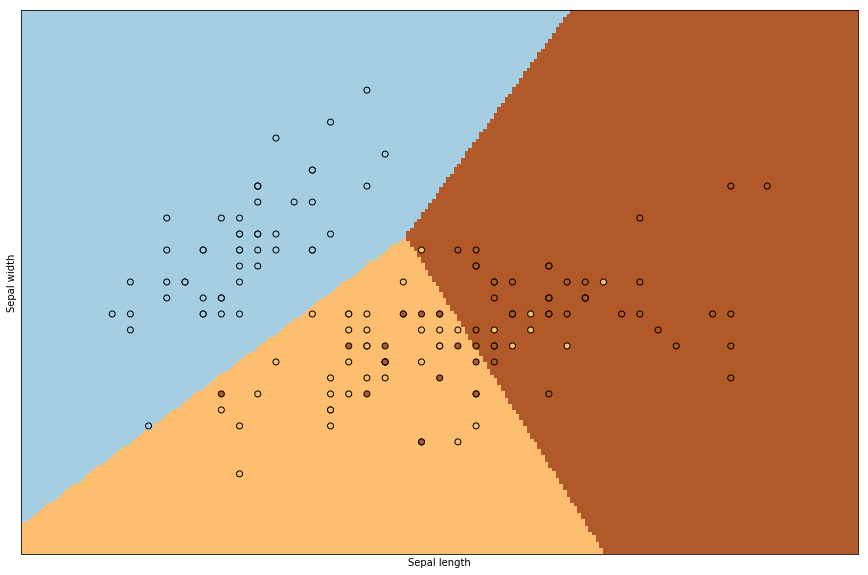

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

### PLOTTING ###
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
def target_map(iris_labels):
    """
    :returns: 
        'setosa' if the label is 0
        'versicolor' if the label is 1
        'virginica' if the label is 2
    It raises an error in other cases.
    """
    
    if iris_labels == 0:
        return 'setosa'
    elif iris_labels == 1:
        return 'versicolor'
    elif iris_labels == 2:
        return 'virginica'
    else:
        raise ValueError('Dude! There is an issue in data')
        

target_map_vec = np.vectorize(target_map) # vectorize() is a numpy method giving a function
                                          # the property to be applied to a list

#### Multivariable Logistic regression

Here, we want to use all the features and predict the kind of iris of a flower having sepal lenght and width `4.7` and `2.9` and petal lenght and width `1.9` and `0.3`.

In [17]:
# Let's define an array for the test flower
iris_test = np.array([4.7, 2.9, 1.9, 0.3]).reshape(1,-1)

In [18]:
logreg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
labY = target_map_vec(Y)
logreg.fit(iris.data, labY)
iris_pred = logreg.predict(iris_test)
confidence = logreg.predict_proba(iris_test).max()

print('The predicted kind of iris is %s, with a confidence of %.2f%%' %(iris_pred[0],  confidence*100))

The predicted kind of iris is setosa, with a confidence of 91.81%


Well, we can be quite sure about it. 

But, let's go in depth and explore a bit more the meaning of the graph above.

## Decision Boundaries

A decision boundary in a nutshell, is a surface that separates data points belonging to different class lables.

Although apparently simple at first glance, there is quite a lot of useful information to be gleaned from visualising a decision boundary, information that will give you an intuitive grasp of learning models.

Here, we can try to illustrate the definition of such a (hyper)-surface by an example.

Let's suppose we have again the problem of classifying whether our iris test is setosa, or not. This is a so-called _binary classification_, meaning the answer can only be yes/no.
As above, we restrict to sepal measures, ignoring petal ones for now.

The hypothesis function has the sigmoid form,
$$
    h_\beta(x) = g(\beta_0 + \beta_1 x_1 + \beta_2 x_2) \, .
$$

Let's use our implementation of gradient descent to predict $\beta$ parameters.

In [19]:
# Add the one column to X
X = np.hstack((np.ones((X.shape[0],1)), X)) # we add the bias terms, cofactors 1 of β[0]

# Recall Y can only be 0 or 1. We binarise our classes.
Y_bin = np.array([int(y == 0) for y in Y])

# Initialise β
beta = np.zeros(X.shape[1])

beta, cost, betaList, iterations = gradientDescent(beta, X, Y_bin)

In [20]:
#print β to verify
beta

array([ 0.98738777, -3.42012037,  5.57638438])

So we have predicted the following parameters 

\begin{align}
    \beta_0 = 0.9874\, , && \beta_1 = -3.4201\, , && \beta_2 = 5.5764\, .
\end{align}

Recall, as before the prediction is $y=1$ if and only if $h_\beta(x) \geq 0.5$ and this is equivalent to $\beta X \geq 0$.

In our case, we have the inequation

$$ \beta_0 + \beta_1 x_1 + \beta_2 x_2 \geq 0$$

Meaning all the points in a $(x_1, x_2)$ plan satisying such inequation are points whose prediction is $y=1$. Viceversa, the remaining region of the plan is made by points having predicted $y = 0$.

The inequation is linear, this implies the curve delimiting the two regions ($y=1$ and $y=0$) is a line.

Let's put our data on a graph and plot the line of equation $ x_2 = - \tfrac{1}{\beta_2}(\beta_1 x_1 +\beta_0) $.

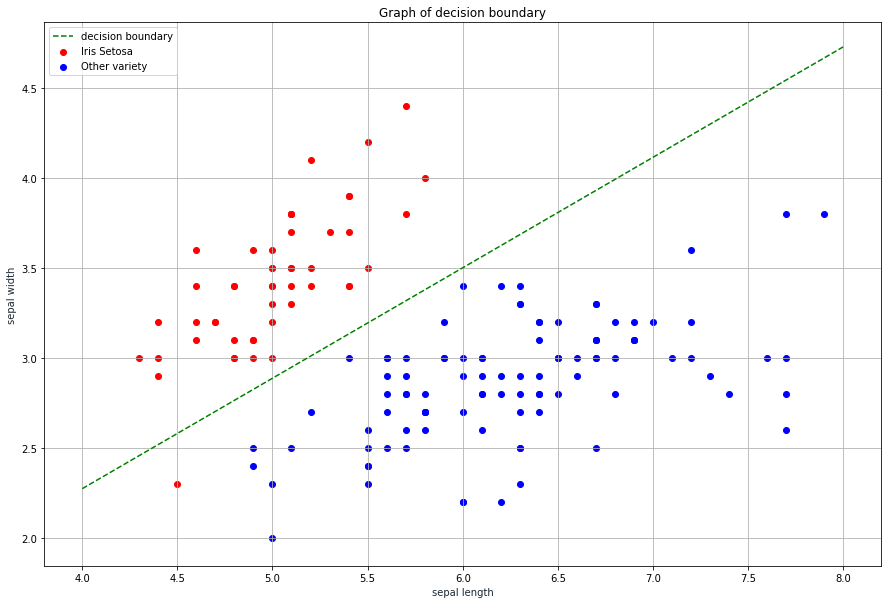

In [21]:
plt.figure(figsize=(15,10))

x = np.linspace(4,8,100)
y = -(1/beta[2])*(beta[1]*x + beta[0]) # decision boundary equation

plt.plot(x, y, '--g', label='decision boundary')
plt.scatter(X[Y_bin==1,1], X[Y_bin==1,2], c='red', label = 'Iris Setosa')
plt.scatter(X[Y_bin==0,1], X[Y_bin==0,2], c='blue', label = 'Other variety')

plt.title('Graph of decision boundary')
plt.xlabel('sepal length', color='#1C2833')
plt.ylabel('sepal width', color='#1C2833')
plt.legend(loc='upper left')

plt.grid()
plt.show()

A graphical animation of what we have done can be shown as follows

![title](https://miro.medium.com/max/1400/1*PQ8tdohapfm-YHlrRIRuOA.gif)

### Non-Linear decision boundaries

To conclude this section about decision boundary, let's take into account the case where the argument of sigmoid function is not a linear function.

For instance,

$$ h_\beta(x) = g(\beta^T X) = g(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \ldots) \, .$$

This function describe the test of some microchip in a production chain.
Features $x_1$ and $x_2$ are the score results of the test respectively on two microchips.

Let's load the data in a dataframe.

In [22]:
df_nonlin = pd.read_csv('Data/LogisticReg/data2.txt', header=None)
df_nonlin.columns = ['x1', 'x2', 'label']

In [23]:
X = df_nonlin.iloc[:,:-1]
y = df_nonlin.iloc[:,2]

We can produce a plot to visualise data.

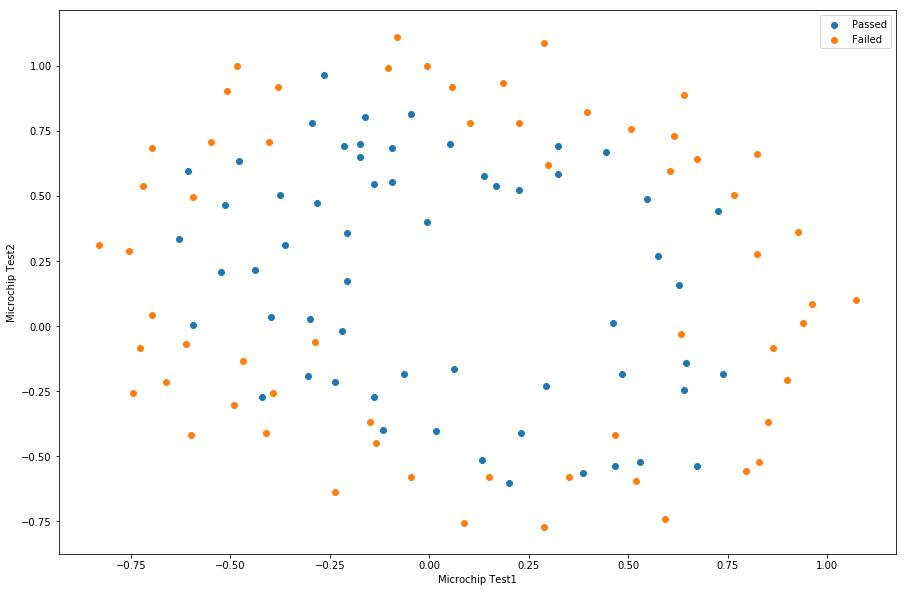

In [24]:
pos = (y == 1)
neg = (y == 0)

passed = plt.scatter(X[pos]['x1'].values, X[pos]['x2'].values)
failed = plt.scatter(X[neg]['x1'].values, X[neg]['x2'].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

As one can see, the decision boundary will hardly be a straight line.

As in the case of polynomial regression, we can use the very same function of logistic regression, by performing a _feature mapping_.

In [25]:
def mapFeature(X1, X2, degree):
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out

X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree = 6)

Let's perform now gradient descent.

In [26]:
# Initialise β
beta = np.zeros(X.shape[1])

print('Initial cost should be approximatively 0.69314718')
print('Initial cost you calculated is %.7f' %costFunction(beta,X,y))

Initial cost should be approximatively 0.69314718
Initial cost you calculated is 0.6931472


In [27]:
betaFit, cost, betaList, iterations = gradientDescent(beta, X, y, regular = 1)

In [28]:
def mapFeatureForPlotting(X1, X2, degree):
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

In [29]:
def contourPlot(X, y, beta, xlabel = None, ylabel = None, labelLegend = None, degree = 6):
    """
        :return: the contour plot of the 
    """
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree = degree), beta)
            
    pos = y.values.flatten() == 1
    neg = y.values.flatten() == 0
    
    positive = plt.scatter(X[pos]['x1'], X[pos]['x2'])
    negative = plt.scatter(X[neg]['x1'], X[neg]['x2'])
    plt.contour(u,v,z,0)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    if labelLegend is not None:
        plt.legend((positive, negative), labelLegend)
    plt.show()

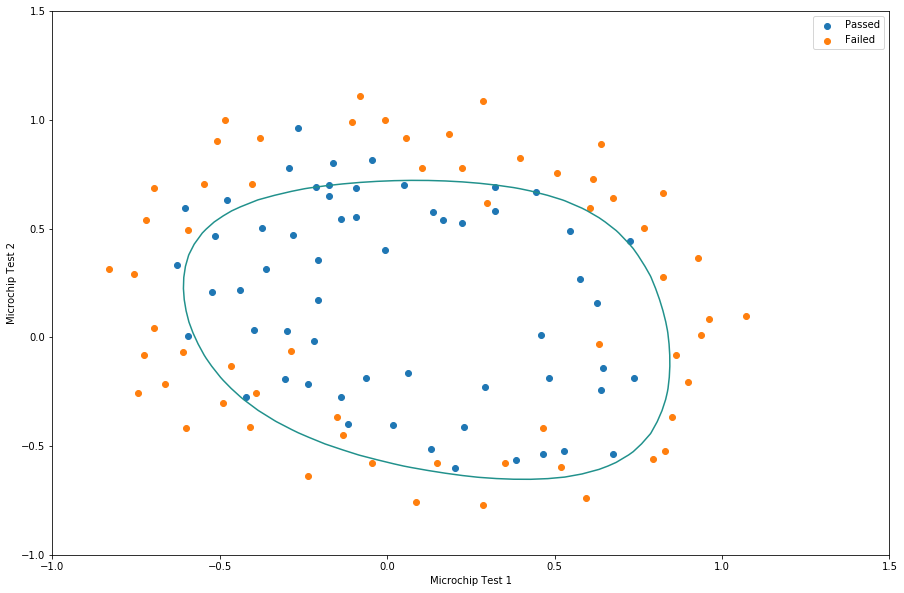

In [30]:
X_plot = df_nonlin.iloc[:,:-1]
contourPlot(X_plot, y, betaFit, xlabel='Microchip Test 1', ylabel='Microchip Test 2', labelLegend=('Passed', 'Failed'))

## Exercise

In this exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

#### Visualising data

We start by importing and plotting the given data:

In [31]:
# Loading the data. The first two columns contain the exam scores and the third column contains the label.
data = pd.read_csv('Data/LogisticReg/data1.txt', header=None)
data.columns = ['Exam1_score', 'Exam2_score', 'Admission']

# Viewing the imported values (first 5 rows)
data.head()

,Exam1_score,Exam2_score,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [32]:
# Let's define X, y as arrays
x1 = data.Exam1_score
x2 = data.Exam2_score
y = data.Admission

x = np.column_stack([x1, x2])

In [33]:
import seaborn; seaborn.set_style('whitegrid') # import seaborn for styles

# Creating plotData method to display the figure where the axes are the two exam scores.
def plotData(x, y, x1label, x2label, labelPos, labelNeg):
    
    plt.figure(figsize=(15,10))
    # Separating positive and negative scores (in this case 1 and 0 values):
    pos = y==1
    neg = y==0

    # Scatter plotting the data, filtering them according the pos/neg values:
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label=labelPos)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='yellow', marker='o', edgecolors='b', label=labelNeg)

    # Labels and limits:
    plt.xlabel(x1label)
    plt.ylabel(x2label)
    plt.xlim(x[:, 0].min()-5, x[:, 0].max()+5)
    plt.ylim(x[:, 1].min()-5, x[:, 1].max()+5)

    # Legend:
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k');

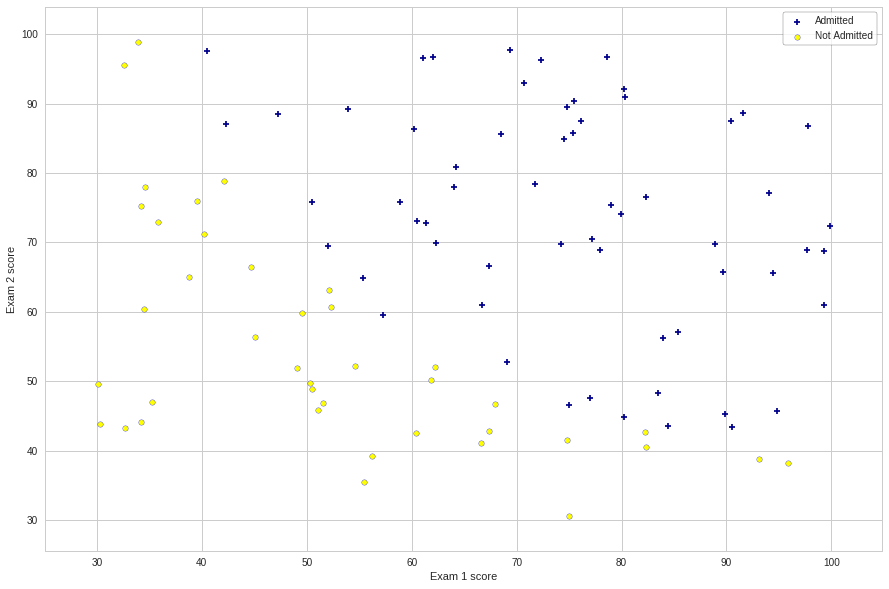

In [34]:
# Plotting the initial figure:
plotData(x, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

#### Exercise: find and plot the decision boundary for the dataset above

We add an additional first column to X and set it to all ones. Also, we add theta and initialize the parameters to 0's.

In [35]:
X = np.hstack((np.ones((x.shape[0],1)), x))

# initialise beta to zero.
beta = np.zeros(X.shape[1])
beta

array([0., 0., 0.])

We call `costFunction` and `gradientFunc` methods using the initial parameters of $\beta$.

In [36]:
J = costFunction(beta, X, y)
gradient = gradientFunc(beta, X, y)

# We should see that the cost is about 0.693 for this exercise:
print("Your calculated cost: %0.3f"%(J))
print('You should see that the cost is about 0.693 \n')
print("Gradient: {0}".format(gradient))

Your calculated cost: 0.693
You should see that the cost is about 0.693 

Gradient: [ -0.1        -12.00921659 -11.26284221]


In [37]:
# Let us find the fit parameters for our data
from scipy.optimize import minimize

res = minimize(costFunction, beta, args=(X,y), method=None, jac=gradientFunc, options={'maxiter':400})

In [38]:
betaFit = res.x

In [39]:
print('your calculated fit parameters %s' %betaFit)
print('you should obtain: [-25.16133643,   0.20623177,   0.2014716 ])')

your calculated fit parameters [-25.16133643   0.20623177   0.2014716 ]
you should obtain: [-25.16133643,   0.20623177,   0.2014716 ])


We are ready to plot the (linear) decision boundary

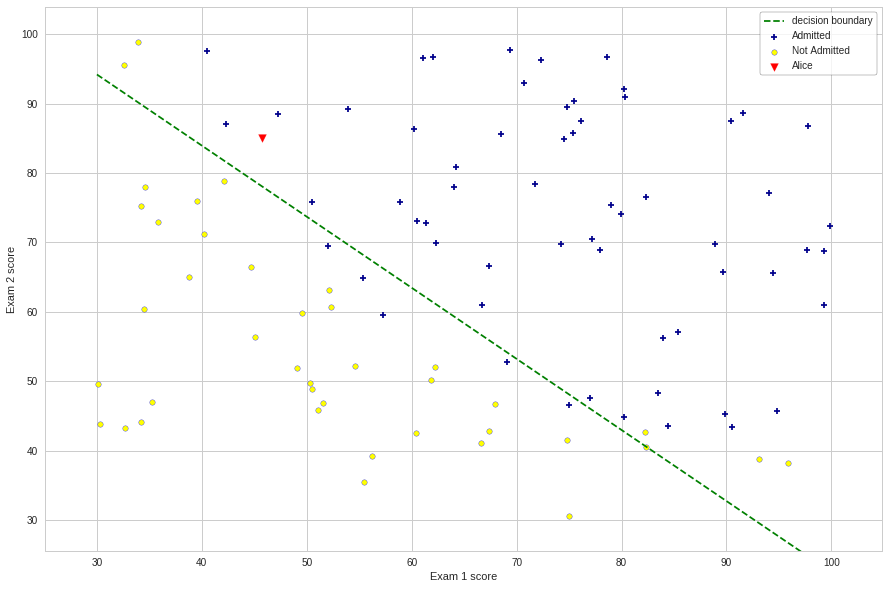

In [40]:
plt.figure(figsize=(15,10))
# Separating positive and negative scores (in this case 1 and 0 values):
pos = y==1
neg = y==0

t = np.linspace(30,100, 1000)
z = -(1/betaFit[2])*(betaFit[1]*t + betaFit[0]) # linear decision boundary equation

# plot decision boundary
plt.plot(t, z, '--g', label='decision boundary')
# Scatter plotting the data, filtering them according the pos/neg values:
plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label='Admitted')
plt.scatter(x[neg, 0], x[neg, 1], s=30, c='yellow', marker='o', edgecolors='b', label='Not Admitted')
plt.scatter(45.7, 85, s=60, c= 'red', marker = 'v', label = 'Alice')

# Labels and limits:
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim(x[:, 0].min()-5, x[:, 0].max()+5)
plt.ylim(x[:, 1].min()-5, x[:, 1].max()+5)

# Legend:
pst = plt.legend(loc='upper right', frameon=True)
pst.get_frame().set_edgecolor('k');

#### Find the admission probability for a test student

Let's now predict the admission result of Alice, a student having a score vector in two exams as
```python
x1 = 45.7 
x2 = 85.0
```

In [41]:
# Exam scores for Alice
x1Alice = 45.7
x2Alice = 85.0

xAlice = np.column_stack([x1Alice, x2Alice])
XAlice = np.hstack((np.ones((xAlice.shape[0],1)), xAlice)) # we add the intercept cofactors 1

In [42]:
def pred(X, beta):
    hBetaX = sigmoid(np.dot(X, beta))
    if hBetaX < 0 or hBetaX > 1:
        raise ValueError("Hypothesis function value out of range.")
        
    if hBetaX >= 0.5:
        y = 1
    else:
        y = 0

    return y

In [43]:
# Let us define the model to use sklearn for comparison
model = LogisticRegression(solver = 'liblinear').fit(X, y)

In [44]:
# Prediction for Alice
print('Your prediction for Alice: ', pred(XAlice, betaFit))
print('You should get: ', model.predict(XAlice)[0])

Your prediction for Alice:  1
You should get:  1


Now, as before, we can give a score of confidence to our prediction, thanks to probability.

In [45]:
print('probability of admission with sklearn: %.2f %%' %model.predict_proba(XAlice)[0][1])
print('probability of admission with gradient descent: %.2f %%' %sigmoid(np.dot(XAlice, betaFit)))

probability of admission with sklearn: 0.63 %
probability of admission with gradient descent: 0.80 %


Why such a difference?

Well, `sklearn` performs the best fit for our data. Probably a second degree fit would have been more appropriate to our data. This would bring the decision boundary closer to `xAlice`, and then the probability would be lowered.

#### Bonus Exercise 1

> Try to implement a second degree logistic regression, using `mapFeatures` and `minimize` functions and plot the decision boundary so obtained.

In [46]:
X = mapFeature(X[:,1], X[:,2], degree = 2)

print(X.shape)

(100, 6)


In [47]:
beta_zero = np.zeros(X.shape[1])
res = minimize(costFunction, beta_zero, args=(X,y), method=None, jac=gradientFunc, options={'maxiter':400})

beta = res.x

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [48]:
beta

array([ -7.17590232,   3.29119389, -44.57784957,  -0.15916887,
         0.64938899,   0.22947932])

In [49]:
def contourPlot(X, y, beta, xlabel = None, ylabel = None, labelLegend = None, degree = 6):
    """
        :return: the contour plot of the 
    """
    u = np.linspace(-1, 15, 100)
    v = np.linspace(-1, 15, 100)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j], degree = degree), beta)
            
   # pos = y.values.flatten() == 1
   # neg = y.values.flatten() == 0
    
    #positive = plt.scatter(X[pos]['x1'], X[pos]['x2'])
    #negative = plt.scatter(X[neg]['x1'], X[neg]['x2'])
    plt.contour(u,v,z,0)
    
    #if xlabel is not None:
     #   plt.xlabel(xlabel)
    #if ylabel is not None:
     #   plt.ylabel(ylabel)
        
    #if labelLegend is not None:
     #   plt.legend((positive, negative), labelLegend)
    plt.show()

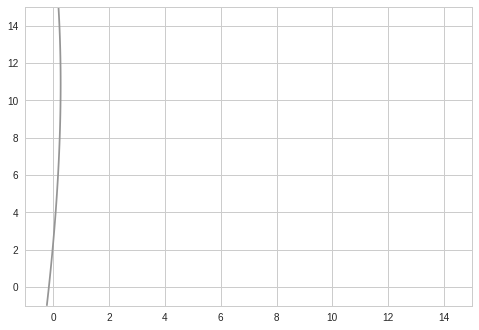

In [50]:
contourPlot(X, y, beta, xlabel='Exam 1', ylabel='Exam 2', labelLegend=('Passed', 'Failed'), degree =2)

#### Bonus Exercise 2

> Why don't we use the squared difference cost function as in the case of linear regression?

_Try to answer the question above, by implementing the squared difference cost function for logistic regression, then apply a gradient descent method with this cost function to one of the previous datasets and compare results, possibly with plots._

In [51]:
def sqrdiff(beta, X, y):
    m = len(y)
    
    hbetaX = sigmoid(np.dot(X, beta))
    
    sqrdiffJ = np.dot((hbetaX - y ), (hbetaX - y ))/(2*m)
    
    return sqrdiffJ

In [52]:
data_ex = pd.read_csv('Data/LogisticReg/data1.txt')
data_ex.columns = ['x1', 'x2', 'label']

In [53]:
x1 = data_ex.x1
x2 = data_ex.x2
y  = data_ex.label

x = np.column_stack([x1, x2])

In [54]:
# Add bias terms to X
X = np.hstack((np.ones((x.shape[0],1)), x))

# Initialise β
beta = np.zeros(X.shape[1])

In [55]:
def gradDescentSqrDiff(beta, X, y, alpha = .01, max_iterations = 1500, cost_thr = 1e-10):
    
    m = len(y) # Number of training examples
    
    cost = []
    betaMod = beta.copy()
    betaHist = []
    
    for i in range(max_iterations):                                 # complete here (the student has to write 
        betaMod = betaMod - (gradientFunc(betaMod, X, y)* alpha)    # down this for-loop)
        cost.append(sqrdiff(betaMod, X, y))
        betaHist.append(list(betaMod))
        # Exit conditions
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    
    betaHist = np.array(betaHist)
    
    return betaMod, cost, betaHist, i

In [56]:
beta_prim, J_prim, beta_prim_hist, iterations =  gradDescentSqrDiff(beta, X, y)

In [62]:
beta_prim_hist[:,1]

array([ 0.12305389, -0.08367822,  0.36913323, ...,  0.25128666,
        0.04455281,  0.48647579])

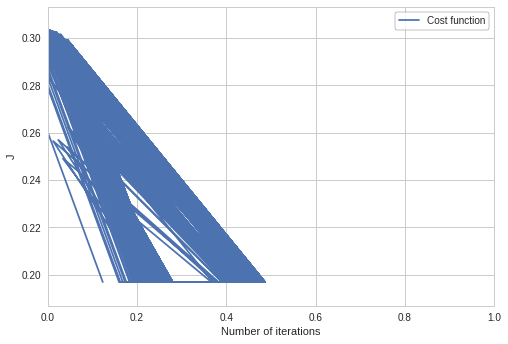

In [68]:
# Plot the cost as function of number of iterations
plt.plot(beta_prim_hist[:,1], J_prim, label = 'Cost function')

# Plot limits
plt.xlim(0,1) # I take only the first 100 iterations for the sake of clarity
plt.ylim(J_prim.min()-1e-2, J_prim.max()+1e-2)

# Axis names
plt.xlabel('Number of iterations')
plt.ylabel('J')

# Legend
pst = plt.legend(loc='upper right', frameon=True)
pst.get_frame().set_edgecolor('k');

This function is not [convex](https://en.wikipedia.org/wiki/Convex_function)!

It might happen you end in a local minimum. We use convex functions since there is a mathematical theorem in real analysis stating that in an interval, a convex function always has extremal points - _i.e._ a maximum and a minimum.



## Further readings

A simple introduction to logistic regression can be found [here](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148).

Nice github projects on implementation of such techniques can be found [here](https://github.com/sagarmk/Logistic-regression-from-scratch) and [here](https://github.com/AntoineGuillot2/Logistic-Regression-Python/blob/master/LogisticReg.py).

Finally, a non-trivial example with categorical encoder and visualisation is available in this [article](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8).